In [269]:
# Installing the required Packagesb
from ieseg import partition
from ieseg                  import roc
from ieseg                  import lift
from ieseg                  import cumulativeResponse
from ieseg                  import cumulativeGains

import sys
import pandas               as pd
import numpy                as np
import seaborn              as sns
import matplotlib.pyplot    as plt
from pandas                 import DataFrame
from pandas                 import read_csv
from pandas                 import Series
from numpy                  import array
from numpy                  import random
from matplotlib             import pyplot
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the given CSV files and storing them in the required variables

train_set =read_csv("C:/Users/feledu1/Desktop/S2/Statistical and Machine Learning Approach for Marketing/Kaggle/Data/orange_churn_train.csv",sep=",")
test_set  =read_csv("C:/Users/feledu1/Desktop/S2/Statistical and Machine Learning Approach for Marketing/Kaggle/Data/orange_churn_test.csv",sep=",")

In [3]:
train_set.head(3)

,cust_id,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,...,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230,churn
0,3,NaN,NaN,NaN,NaN,NaN,1351.0,7.0,NaN,NaN,...,catzS2D,LM8l689qOp,NaN,ELof,7P5s,ZI9m,NoEd,mj86,NaN,0
1,4,NaN,NaN,NaN,NaN,NaN,644.0,0.0,NaN,NaN,...,76DJixu,LM8l689qOp,NaN,NaN,7P5s,RAYp,F2FyR07IdsN7I,NaN,NaN,0
2,7,NaN,NaN,NaN,NaN,NaN,2583.0,0.0,NaN,NaN,...,I5dzv5f,LM8l689qOp,NaN,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN,NaN,1


In [ ]:
# which columns have integers/numeric values ?

In [9]:
train_set.dtypes

cust_id      int64
Var1       float64
Var2       float64
Var3       float64
Var4       float64
            ...   
Var227      object
Var228      object
Var229      object
Var230     float64
churn        int64
Length: 232, dtype: object

In [10]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 232 entries, cust_id to churn
dtypes: float64(191), int64(3), object(38)
memory usage: 17.7+ MB


In [11]:
train_set.describe()

,cust_id,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,...,Var184,Var185,Var186,Var187,Var188,Var189,Var190,Var209,Var230,churn
count,10000.000000,125.000000,262.0,262.000000,300.000000,2.940000e+02,8913.000000,8911.000000,0.0,125.000000,...,262.000000,0.0,125.000000,125.000000,262.000000,4278.000000,55.000000,0.0,0.0,10000.000000
mean,9972.052000,11.712000,0.0,313.568702,0.060000,2.068643e+05,1347.844385,6.860173,NaN,46.656000,...,6.595420,NaN,3.264000,14.432000,165.556031,273.326788,22753.314018,NaN,NaN,0.073600
std,5807.498083,36.626012,0.0,1573.814840,0.733617,6.730947e+05,2869.051478,6.401895,NaN,107.036556,...,16.284246,NaN,6.398266,38.583453,113.718218,86.023727,33767.149848,NaN,NaN,0.261132
min,3.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,NaN,0.000000,...,0.000000,NaN,0.000000,0.000000,0.000000,12.000000,0.270000,NaN,NaN,0.000000
25%,4932.250000,0.000000,0.0,0.000000,0.000000,0.000000e+00,518.000000,0.000000,NaN,4.000000,...,0.000000,NaN,0.000000,0.000000,19.380000,210.000000,2924.325000,NaN,NaN,0.000000
50%,9925.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,854.000000,7.000000,NaN,16.000000,...,0.000000,NaN,0.000000,4.000000,202.620000,276.000000,14769.900000,NaN,NaN,0.000000
75%,15028.250000,16.000000,0.0,0.000000,0.000000,7.312750e+04,1435.000000,7.000000,NaN,42.000000,...,8.000000,NaN,6.000000,12.000000,253.065000,330.000000,27440.505000,NaN,NaN,0.000000
max,19999.000000,392.000000,0.0,13752.000000,9.000000,6.048000e+06,114079.000000,35.000000,NaN,962.000000,...,140.000000,NaN,30.000000,336.000000,452.760000,642.000000,230427.000000,NaN,NaN,1.000000


cust_id        0
Var1        9875
Var2        9738
Var3        9738
Var4        9700
           ...  
Var227         0
Var228         0
Var229      5670
Var230     10000
churn          0
Length: 232, dtype: int64


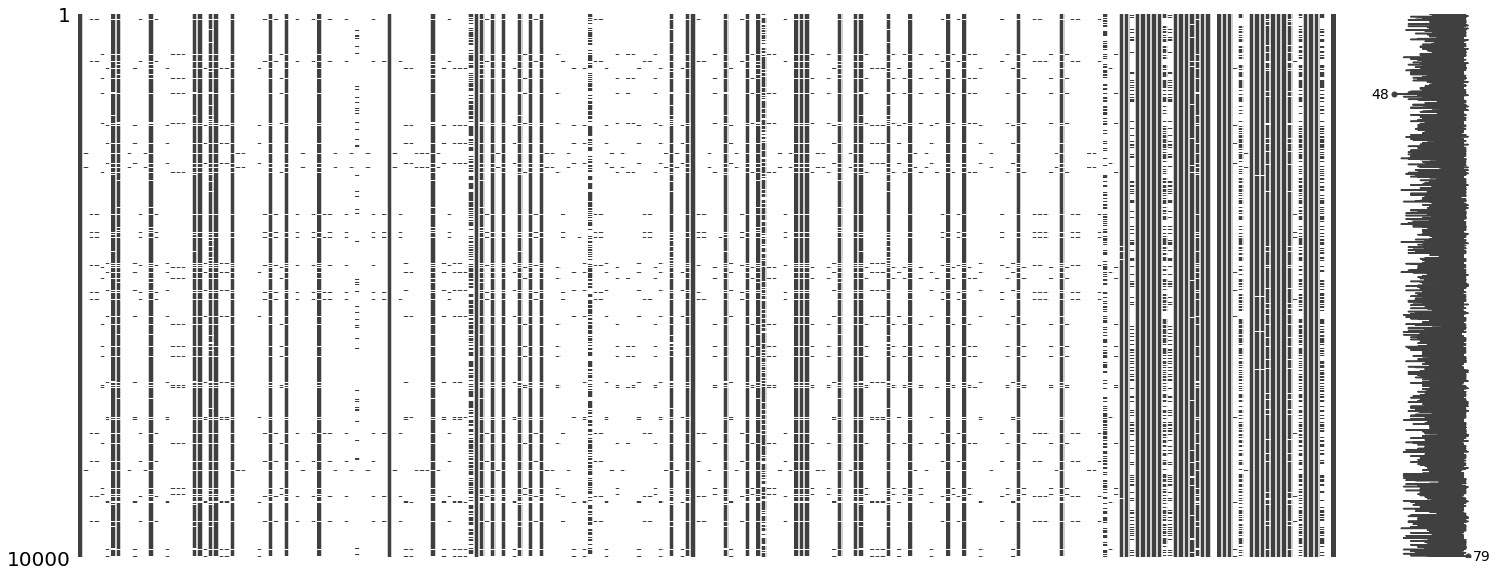

In [12]:
# check missing values
print(train_set.isna().sum())

import missingno as msno # pip install missingno
%matplotlib inline
msno.matrix(train_set)

In [13]:
# first get rid of all columns with null values
null_series = train_set.isnull().sum() # The number of missing values from each column in your dataframe
full_col_series = null_series[null_series == 0] # Will keep only the columns with no missing values

train_nomissing = train_set[full_col_series.index]

In [15]:
null_series

cust_id        0
Var1        9875
Var2        9738
Var3        9738
Var4        9700
           ...  
Var227         0
Var228         0
Var229      5670
Var230     10000
churn          0
Length: 232, dtype: int64

In [14]:
train_nomissing.head()

,cust_id,Var57,Var73,Var113,Var193,Var195,Var196,Var198,Var202,Var204,...,Var211,Var212,Var216,Var220,Var221,Var222,Var226,Var227,Var228,churn
0,3,2.796197,200,-177468.4,TW8dXluYzKpktZjuY8kSPBaZa,taul,1K8T,fhk21Ss,GRBm,vm5R,...,L84s,hFuvTXnQzBljb,11pPX7K,4UxGlow,zCkv,catzS2D,7P5s,ZI9m,NoEd,0
1,4,3.288400,22,118763.6,RO12,taul,1K8T,8ij6Lg8,kPPv,kJJ7,...,L84s,NhsEn4L,mAja5EA,7OmVzos,oslk,76DJixu,7P5s,RAYp,F2FyR07IdsN7I,0
2,7,1.880154,20,196783.2,RO12,taul,1K8T,DXsZJjN,yhOO,YULl,...,Mtgm,NhsEn4L,7WwOAni,meWR98m,oslk,I5dzv5f,FSa2,RAYp,F2FyR07IdsN7I,1
3,8,5.640889,80,-323799.6,RO12,taul,1K8T,xniu5tB,icKQ,k13i,...,L84s,NhsEn4L,mAjbk_S,ie2oOXS,oslk,xwyAw04,fKCe,RAYp,F2FyR07IdsN7I,0
4,9,4.854091,20,-374466.4,RO12,taul,1K8T,8ij6Lg8,xmlr,vm5R,...,Mtgm,NhsEn4L,7WwuNea,7OmVzos,oslk,76DJixu,7P5s,RAYp,F2FyR07IdsN7I,0


In [33]:
# columns with missing value
full_col_null = null_series[null_series <= 5000]
train_few_missing = train_set[full_col_null.index]
train_few_missing.head()

,cust_id,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,...,Var218,Var219,Var220,Var221,Var222,Var223,Var226,Var227,Var228,churn
0,3,1351.0,7.0,120.0,64.0,80.0,10.0,24.0,200.00,0.0,...,cJvF,FzaX,4UxGlow,zCkv,catzS2D,LM8l689qOp,7P5s,ZI9m,NoEd,0
1,4,644.0,0.0,0.0,148.0,185.0,0.0,40.0,186.64,0.0,...,cJvF,FzaX,7OmVzos,oslk,76DJixu,LM8l689qOp,7P5s,RAYp,F2FyR07IdsN7I,0
2,7,2583.0,0.0,0.0,984.0,1230.0,42.0,152.0,356.64,5.0,...,UYBR,FzaX,meWR98m,oslk,I5dzv5f,LM8l689qOp,FSa2,RAYp,F2FyR07IdsN7I,1
3,8,1463.0,7.0,5068.0,276.0,345.0,12.0,288.0,166.56,0.0,...,UYBR,FzaX,ie2oOXS,oslk,xwyAw04,LM8l689qOp,fKCe,RAYp,F2FyR07IdsN7I,0
4,9,77.0,0.0,0.0,24.0,30.0,0.0,8.0,278.96,5.0,...,cJvF,NaN,7OmVzos,oslk,76DJixu,NaN,7P5s,RAYp,F2FyR07IdsN7I,0


In [ ]:
# play with the 22 columns completely without missing. come back leter to see the performance of the model with the subset of columns
# practice using cross validation, correlation matrix and lasso regression for those 
# divide the training into training and test set 70:30
# apply cross validation on the training set
# check the correlation matrix
# try lasso regression first to pick the most valuable 
# check the correlation matrix
# work with columns with only numbers first

In [34]:
train_nomissing.head()

,cust_id,Var57,Var73,Var113,Var193,Var195,Var196,Var198,Var202,Var204,...,Var211,Var212,Var216,Var220,Var221,Var222,Var226,Var227,Var228,churn
0,3,2.796197,200,-177468.4,TW8dXluYzKpktZjuY8kSPBaZa,taul,1K8T,fhk21Ss,GRBm,vm5R,...,L84s,hFuvTXnQzBljb,11pPX7K,4UxGlow,zCkv,catzS2D,7P5s,ZI9m,NoEd,0
1,4,3.288400,22,118763.6,RO12,taul,1K8T,8ij6Lg8,kPPv,kJJ7,...,L84s,NhsEn4L,mAja5EA,7OmVzos,oslk,76DJixu,7P5s,RAYp,F2FyR07IdsN7I,0
2,7,1.880154,20,196783.2,RO12,taul,1K8T,DXsZJjN,yhOO,YULl,...,Mtgm,NhsEn4L,7WwOAni,meWR98m,oslk,I5dzv5f,FSa2,RAYp,F2FyR07IdsN7I,1
3,8,5.640889,80,-323799.6,RO12,taul,1K8T,xniu5tB,icKQ,k13i,...,L84s,NhsEn4L,mAjbk_S,ie2oOXS,oslk,xwyAw04,fKCe,RAYp,F2FyR07IdsN7I,0
4,9,4.854091,20,-374466.4,RO12,taul,1K8T,8ij6Lg8,xmlr,vm5R,...,Mtgm,NhsEn4L,7WwuNea,7OmVzos,oslk,76DJixu,7P5s,RAYp,F2FyR07IdsN7I,0


In [50]:
train_nomissing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cust_id  10000 non-null  int64  
 1   Var57    10000 non-null  float64
 2   Var73    10000 non-null  int64  
 3   Var113   10000 non-null  float64
 4   Var193   10000 non-null  object 
 5   Var195   10000 non-null  object 
 6   Var196   10000 non-null  object 
 7   Var198   10000 non-null  object 
 8   Var202   10000 non-null  object 
 9   Var204   10000 non-null  object 
 10  Var207   10000 non-null  object 
 11  Var210   10000 non-null  object 
 12  Var211   10000 non-null  object 
 13  Var212   10000 non-null  object 
 14  Var216   10000 non-null  object 
 15  Var220   10000 non-null  object 
 16  Var221   10000 non-null  object 
 17  Var222   10000 non-null  object 
 18  Var226   10000 non-null  object 
 19  Var227   10000 non-null  object 
 20  Var228   10000 non-null  object 
 21  churn    1000

In [90]:
# inspecting the columns
train_nomissing.iloc[0:10, 1:22]

,Var57,Var73,Var113,Var193,Var195,Var196,Var198,Var202,Var204,Var207,...,Var211,Var212,Var216,Var220,Var221,Var222,Var226,Var227,Var228,churn
0,2.796197,200,-177468.400,TW8dXluYzKpktZjuY8kSPBaZa,taul,1K8T,fhk21Ss,GRBm,vm5R,7M47J5GA0pTYIFxg5uy,...,L84s,hFuvTXnQzBljb,11pPX7K,4UxGlow,zCkv,catzS2D,7P5s,ZI9m,NoEd,0
1,3.288400,22,118763.600,RO12,taul,1K8T,8ij6Lg8,kPPv,kJJ7,me75fM6ugJ,...,L84s,NhsEn4L,mAja5EA,7OmVzos,oslk,76DJixu,7P5s,RAYp,F2FyR07IdsN7I,0
2,1.880154,20,196783.200,RO12,taul,1K8T,DXsZJjN,yhOO,YULl,me75fM6ugJ,...,Mtgm,NhsEn4L,7WwOAni,meWR98m,oslk,I5dzv5f,FSa2,RAYp,F2FyR07IdsN7I,1
3,5.640889,80,-323799.600,RO12,taul,1K8T,xniu5tB,icKQ,k13i,me75fM6ugJ,...,L84s,NhsEn4L,mAjbk_S,ie2oOXS,oslk,xwyAw04,fKCe,RAYp,F2FyR07IdsN7I,0
4,4.854091,20,-374466.400,RO12,taul,1K8T,8ij6Lg8,xmlr,vm5R,me75fM6ugJ,...,Mtgm,NhsEn4L,7WwuNea,7OmVzos,oslk,76DJixu,7P5s,RAYp,F2FyR07IdsN7I,0
5,0.920743,40,-19157.720,RO12,taul,1K8T,vQ_JaGu,UYif,rGJy,me75fM6ugJ,...,L84s,NhsEn4L,mAjbk_S,i9JuX8Z,oslk,MRPKMwm,Qu4f,RAYp,F2FyR07IdsN7I,0
6,3.790002,56,-245824.000,AERks4l,taul,1K8T,PHNvXy8,taKF,SkZj,NKv3VA1BpP,...,L84s,Ie_5MZs,teAY_NX,UF16siJ,zCkv,APgdzOv,Aoh3,6fzt,xwM2aC7IdeMC0,0
7,1.706259,8,-2179580.000,RO12,taul,1K8T,N45xuYM,o8nX,SkZj,me75fM6ugJ,...,Mtgm,NhsEn4L,7WwCtIM,Led6s0w,oslk,YFaA9vx,Aoh3,RAYp,F2FyR07IdsN7I,0
8,0.263832,134,3786.144,2Knk1KF,taul,1K8T,GQplhSa,bIER,ZKJc,me75fM6ugJ,...,L84s,XfqtO3UdzaXh_,OFqmdNV,9WbYE38,oslk,ZI_Qhib,7FJQ,RAYp,55YFVY9,0
9,5.193762,112,92587.600,2Knk1KF,taul,1K8T,RACNw5i,70T2,wGwL,me75fM6ugJ,...,Mtgm,XfqtO3UdzaXh_,XTbPUYD,9wyNT4W,oslk,poModIn,wX53,RAYp,55YFVY9,0


In [89]:
# train_nomissing.groupby('Var193').Var195.nunique()
# train_nomissing['Var195'].unique() #unique columns
# train_nomissing['Var198'].nunique()# no of unique columns
train_nomissing.nunique()

cust_id    10000
Var57       8659
Var73        124
Var113      9792
Var193        40
Var195        20
Var196         4
Var198      2019
Var202      3771
Var204       100
Var207        13
Var210         6
Var211         2
Var212        68
Var216       938
Var220      2019
Var221         7
Var222      2019
Var226        23
Var227         7
Var228        27
churn          2
dtype: int64

In [115]:
# select meaningful columns
new_train = train_nomissing.iloc[:][['cust_id','Var57','Var73','Var113','Var196','Var210','Var211','Var221','Var227','churn']]

In [116]:
new_train

,cust_id,Var57,Var73,Var113,Var196,Var210,Var211,Var221,Var227,churn
0,3,2.796197,200,-177468.4,1K8T,uKAI,L84s,zCkv,ZI9m,0
1,4,3.288400,22,118763.6,1K8T,uKAI,L84s,oslk,RAYp,0
2,7,1.880154,20,196783.2,1K8T,uKAI,Mtgm,oslk,RAYp,1
3,8,5.640889,80,-323799.6,1K8T,uKAI,L84s,oslk,RAYp,0
4,9,4.854091,20,-374466.4,1K8T,uKAI,Mtgm,oslk,RAYp,0
...,...,...,...,...,...,...,...,...,...,...
9995,19993,6.022645,114,136220.8,1K8T,uKAI,L84s,oslk,RAYp,0
9996,19995,1.383892,170,99110.4,1K8T,uKAI,L84s,oslk,ZI9m,0
9997,19996,2.589190,48,-200218.8,1K8T,uKAI,L84s,oslk,RAYp,0
9998,19997,0.936338,54,-221651.6,1K8T,uKAI,L84s,oslk,RAYp,1


In [117]:
new_train.nunique()

cust_id    10000
Var57       8659
Var73        124
Var113      9792
Var196         4
Var210         6
Var211         2
Var221         7
Var227         7
churn          2
dtype: int64

In [119]:
new_test = test_set.iloc[:][['cust_id','Var57','Var73','Var113','Var196','Var210','Var211','Var221','Var227']]

In [120]:
new_test

,cust_id,Var57,Var73,Var113,Var196,Var210,Var211,Var221,Var227
0,1,1.375775,18,-10550.16,1K8T,uKAI,Mtgm,oslk,RAYp
1,2,6.490067,132,-542628.00,1K8T,uKAI,L84s,oslk,RAYp
2,5,6.791284,12,-251792.00,1K8T,g5HH,L84s,oslk,RAYp
3,6,0.921171,36,-51358.40,1K8T,uKAI,L84s,oslk,RAYp
4,10,3.400769,58,112143.60,1K8T,uKAI,L84s,oslk,RAYp
...,...,...,...,...,...,...,...,...,...
9995,19989,5.642170,28,-680460.00,1K8T,uKAI,L84s,oslk,RAYp
9996,19992,0.569750,198,-862156.00,1K8T,uKAI,Mtgm,QKW8DRm,ZI9m
9997,19994,4.273660,54,146510.40,1K8T,uKAI,L84s,oslk,RAYp
9998,19998,3.852169,8,-1844712.00,1K8T,uKAI,L84s,oslk,RAYp


In [121]:
new_test.nunique()

cust_id    10000
Var57       8630
Var73        126
Var113      9786
Var196         3
Var210         6
Var211         2
Var221         7
Var227         7
dtype: int64

In [122]:
new_test.isna().sum()

cust_id    0
Var57      0
Var73      0
Var113     0
Var196     0
Var210     0
Var211     0
Var221     0
Var227     0
dtype: int64

In [123]:
new_train['Var196'].unique() #unique columns

array(['1K8T', 'z3mO', 'mKeq', 'JA1C'], dtype=object)

In [124]:
new_test['Var196'].unique() #unique columns

array(['1K8T', 'z3mO', 'JA1C'], dtype=object)

In [125]:
# making a decision to keep or leave Var196 column due to the extra class 'mKeq'. OK to leave, it's just one observation out of 10000
new_train[new_train['Var196']=='mKeq'] #select from new_train, where 'Var196' column equals 'mKeq' 

,cust_id,Var57,Var73,Var113,Var196,Var210,Var211,Var221,Var227,churn
2484,4898,2.659902,224,187987.6,mKeq,uKAI,L84s,oslk,ZI9m,0


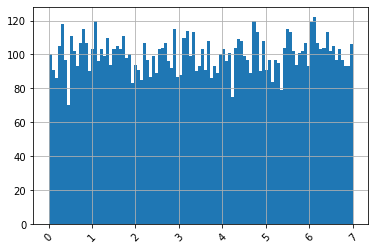

In [130]:
new_train.Var57.hist(bins=100, xrot=45)

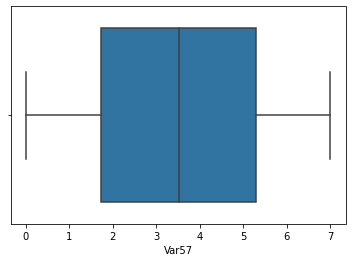

In [133]:
sns.boxplot(x=new_train['Var57'])

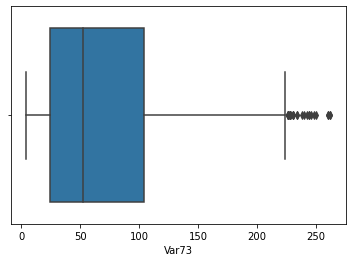

In [134]:
sns.boxplot(x=new_train['Var73'])

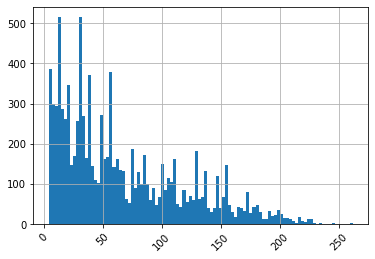

In [137]:
new_train.Var73.hist(bins=100, xrot=45)

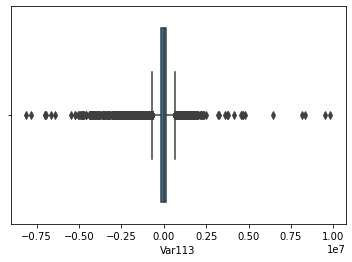

In [135]:
sns.boxplot(x=new_train['Var113'])

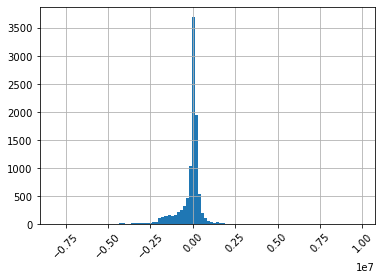

In [136]:
new_train.Var113.hist(bins=100, xrot=45)

In [145]:
# select meaningful columns
new_train2 = train_nomissing.iloc[:][['cust_id','Var57','Var73','Var113','churn']]

In [147]:
# select meaningful columns
new_test2 = test_set.iloc[:][['cust_id','Var57','Var73','Var113']]

In [160]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

In [148]:
reg = LinearRegression()
cv_results = cross_val_score (reg, new_train2, new_test2, cv=5)

In [149]:
cv_results

array([       nan, 0.2478222 , 0.24451249, 0.24853521, 0.24400981])

In [ ]:
cust_id
Var57
Var57Var57
Var113

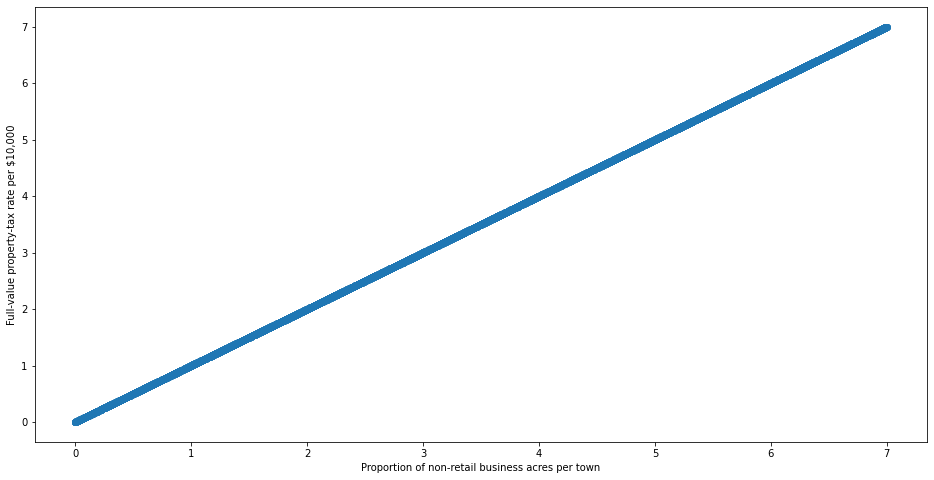

In [152]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(new_train2['Var57'], new_train2['Var57'])
ax.set_xlabel('Proportion of non-retail business acres per town')
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()

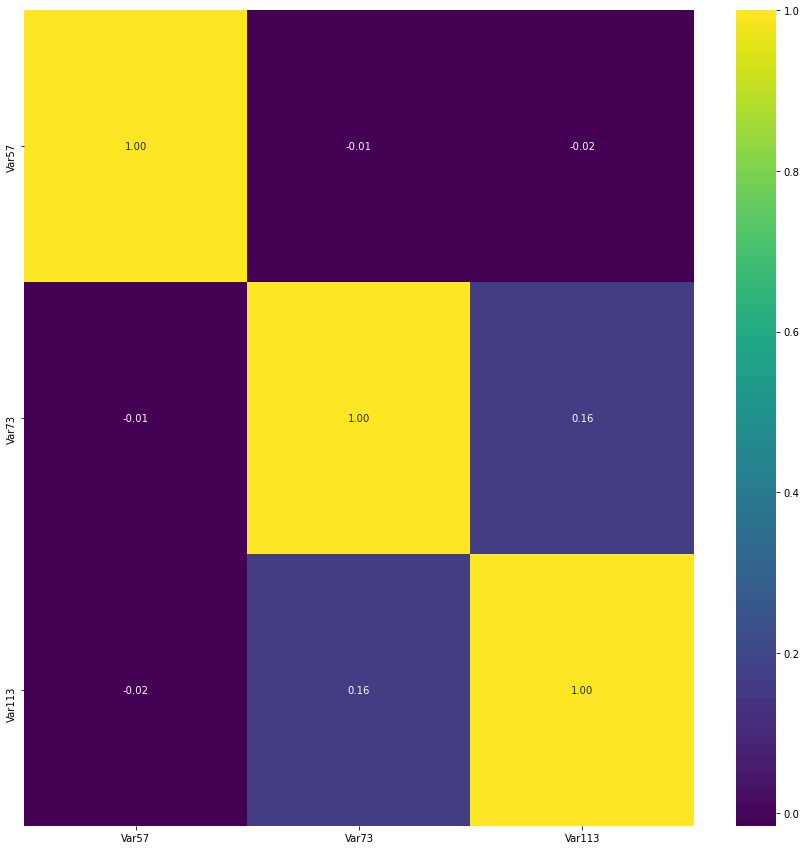

In [153]:
X=new_train2[['Var57','Var73','Var113']]
y=new_train2[['churn']].values.ravel()
plt.figure(figsize=(15,15))
sns.heatmap(X.corr(),annot=True,fmt='.2f',cmap='viridis')

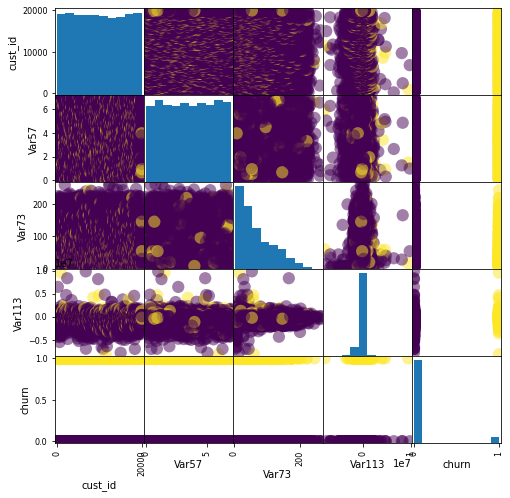

In [226]:
 plot = pd.plotting.scatter_matrix(new_train2, c = y, figsize = [8, 8], s= 150, marker = '0')

In [239]:
X=new_train2[['Var57','Var73','Var113']]
y=new_train2[['churn']].values.ravel()
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42, test_size = 0.4, stratify=y)
log_reg=LogisticRegression(C=1000,max_iter=10000)
log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)
print('--------------------------------------------------------------------------')
print('Logistic Regression:')
print('Traning Model accruracy scores: {:.3f}'.format(log_reg.score(X_train,y_train)))
print('Test Model accruracy scores: {:.3f}'.format(log_reg.score(X_test,y_test)))
print('--------------------------------------------------------------------------')

c_m = confusion_matrix(y_test,y_pred)
c_m

# #Let's not be confused - Visualizing the Confusion Matrix for Training Set

# plt.subplots(figsize=(6,6))
# sns.heatmap(c_m, annot=True, cmap='Blues', fmt='g')
# plt.show()

--------------------------------------------------------------------------
Logistic Regression:
Traning Model accruracy scores: 0.920
Test Model accruracy scores: 0.923
--------------------------------------------------------------------------


array([[3684,   22],
       [ 287,    7]], dtype=int64)

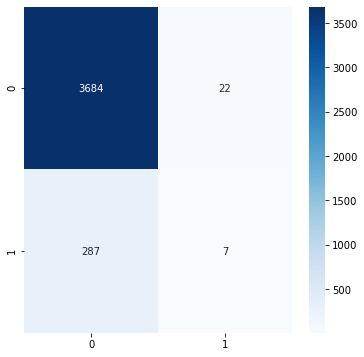

In [240]:
#Let's not be confused - Visualizing the Confusion Matrix for Training Set

plt.subplots(figsize=(6,6))
sns.heatmap(c_m, annot=True, cmap='Blues', fmt='g')
plt.show()

In [220]:
#precision 
precision = 7/(7+22)
precision

0.2413793103448276

In [219]:
#Recall
Recall = 7/(7+287)
Recall

0.023809523809523808

In [222]:
var = (precision*Recall)/(precision+Recall)
print(var)

#F1score
F1score = 2*var
print (F1score)

0.021671826625386997
0.043343653250773995


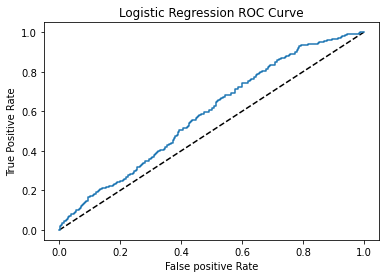

In [223]:
from sklearn.metrics import roc_curve
y_pred_prob = log_reg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label = 'Logistic Regression')
plt.xlabel('False positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

In [236]:
from sklearn.metrics import roc_auc_score
print (roc_auc_score(y_test, y_pred_prob))
cv_scores = cross_val_score (log_reg, X, y, cv=10, scoring ='roc_auc')
print (cv_scores)
print(np.mean(cv_scores))

0.5864602721822674
[0.63409732 0.57551979 0.55248186 0.60816302 0.61066196 0.6134639
 0.61924289 0.56084    0.62150487 0.55904501]
0.5955020627641349


In [531]:
y_pred_prob

array([0.2335964 , 0.03938681, 0.00071179, ..., 0.47070702, 0.34547142,
       0.25349119])

In [358]:
from scipy.stats.mstats import winsorize
from numpy                import array
from numpy                import random
from scipy.stats          import pearsonr
import warnings

warnings.filterwarnings('ignore')
from sklearn import linear_model
from sklearn.linear_model   import LogisticRegression
from sklearn.tree           import DecisionTreeClassifier
from sklearn.ensemble       import RandomForestClassifier
from sklearn.ensemble       import GradientBoostingClassifier
from sklearn.svm            import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors      import KNeighborsClassifier
from sklearn.metrics        import auc

In [359]:
tree         = DecisionTreeClassifier()
logistic     = LogisticRegression(solver = "lbfgs", max_iter = 500)
randomForest = RandomForestClassifier(n_estimators = 100)
boostedTree  = GradientBoostingClassifier()
svm          = SVC(gamma = "scale", probability = True)
neuralNet    = MLPClassifier()
neighbors    = KNeighborsClassifier()

In [360]:
models = {"tree"         :tree,
          "logistic"     :logistic,
          "randomForest" :randomForest,
          "boostedTree"  :boostedTree,
          "svm"          :svm,
          "neuralNet"    :neuralNet,
          "neighbors"    :neighbors
         }

In [ ]:
features = ['Var57','Var73','Var113']

In [389]:
features = ['Var57','Var73','Var113']
target   = "churn"

In [390]:
for model in models:
    models[model].fit(trainingSet_[features],trainingSet_[target])
    print(f"{model} has been trained successfully")

tree has been trained successfully
logistic has been trained successfully
randomForest has been trained successfully
boostedTree has been trained successfully
svm has been trained successfully
neuralNet has been trained successfully
neighbors has been trained successfully


In [391]:
from sklearn.metrics        import accuracy_score
performances = {}

for model in models:
    predictions   = models[model].predict(testSet_[features])
    probabilities = DataFrame(models[model].predict_proba(testSet_[features]))[1]
    accuracy      = accuracy_score(testSet_[target],predictions)
    auc           = roc_auc_score(array(testSet_[target]),array(probabilities))
    
    performances[model] = {"Accuracy":accuracy,"AUC":auc}
DataFrame(performances)

In [392]:
DataFrame(performances)

,tree,logistic,randomForest,boostedTree,svm,neuralNet,neighbors
Accuracy,0.855000,0.909000,0.912000,0.911500,0.915000,0.915000,0.912000
AUC,0.499229,0.588351,0.497298,0.573933,0.542915,0.484931,0.489916


In [243]:
new_train2[["cust_id","churn"]].groupby(["churn"]).count()

,cust_id
churn,
0,9264
1,736


In [246]:
# # a better way to view all columns
# for (index,column) in enumerate(train_set.columns):
#     print(f"Column {index}: {column}")

In [336]:
### Defining Training & Test Sets
partitions = partition(dataFrame = new_train2, splitStrategy = [0.8,0.2])

In [339]:
for (index,dataFrame) in enumerate(partitions):
    print(f"Partition {index} shape : {dataFrame.shape} ({len(dataFrame)/len(new_train2)})")

Partition 0 shape : (8000, 5) (0.8)
Partition 1 shape : (2000, 5) (0.2)


In [340]:
trainingSet_ = partitions[0].copy()
testSet_     = partitions[1].copy()

In [329]:
trainingSet.head()

,cust_id,Var57,Var73,Var113,churn
0,3,2.796197,200,-177468.40,0
1,7,1.880154,20,196783.20,1
2,8,5.640889,80,-323799.60,0
3,14,0.920743,40,-19157.72,0
4,15,3.790002,56,-245824.00,0


In [330]:
# Dealing with outliers
print(trainingSet["Var73"].max())
print(trainingSet["Var73"].min())

262
4


In [265]:
quartile_range = trainingSet["Var73"].quantile([.01,.05,.95,.99]).to_dict()

In [266]:
quartile_range

{0.01: 4.0, 0.05: 8.0, 0.95: 172.0, 0.99: 208.0}

In [281]:
train_outlier = trainingSet.sort_values('Var113')
train_outlier.head(10)

,cust_id,Var57,Var73,Var113,churn
4583,11465,5.955565,60,-8127960.0,1
7318,18349,6.287118,44,-6978480.0,0
4377,10903,0.428114,34,-6974840.0,0
2807,6838,0.887204,4,-6936840.0,0
4692,11765,1.913907,10,-6405000.0,0
255,624,0.137150,6,-5493960.0,0
2114,5146,0.821833,12,-5257880.0,0
2601,6357,4.737450,4,-5062600.0,0
6378,16052,3.706473,6,-5020800.0,0
6123,15359,1.410169,6,-4967640.0,0


In [297]:
check = trainingSet[trainingSet["Var113"] >= quartile_range[0.99]][["cust_id","Var113"]]
check.head(10)

,cust_id,Var73
148,358,208
178,424,208
295,713,208
357,846,208
378,883,208
787,1869,208
802,1911,208
970,2339,208
1065,2571,208
1257,3024,208


In [301]:
trainingSet["Var113"] = winsorize(array(trainingSet["Var113"]), limits=[0.00, 0.01])

In [ ]:
######################### exploring further / excercising with decision trees and the rest of the numeric data to pick the best variables to work on ##################################

In [419]:
# columns with some_missing value
full_col_null = null_series[null_series <= 9940]
train_few_missing = train_set[full_col_null.index]
train_few_missing.head()
train_few_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 210 entries, cust_id to churn
dtypes: float64(169), int64(3), object(38)
memory usage: 16.0+ MB


In [420]:
# dataset with columns that have missing values - note that churn is not here so ill need to merge the final dataset
full_col_null = null_series[null_series != 0]
train_missing = train_set[full_col_null.index]
train_missing.head()

train_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 210 entries, Var1 to Var230
dtypes: float64(189), object(21)
memory usage: 16.0+ MB


In [421]:
# Inspect the Columns

for (index,column) in enumerate(train_few_missing.columns):
    print(f"Column {index}: {column}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 210 entries, cust_id to churn
dtypes: float64(169), int64(3), object(38)
memory usage: 16.0+ MB
Column 0: cust_id
Column 1: Var1
Column 2: Var2
Column 3: Var3
Column 4: Var4
Column 5: Var5
Column 6: Var6
Column 7: Var7
Column 8: Var9
Column 9: Var10
Column 10: Var11
Column 11: Var12
Column 12: Var13
Column 13: Var14
Column 14: Var16
Column 15: Var17
Column 16: Var18
Column 17: Var19
Column 18: Var21
Column 19: Var22
Column 20: Var23
Column 21: Var24
Column 22: Var25
Column 23: Var26
Column 24: Var27
Column 25: Var28
Column 26: Var29
Column 27: Var30
Column 28: Var33
Column 29: Var34
Column 30: Var35
Column 31: Var36
Column 32: Var37
Column 33: Var38
Column 34: Var40
Column 35: Var41
Column 36: Var43
Column 37: Var44
Column 38: Var45
Column 39: Var46
Column 40: Var47
Column 41: Var49
Column 42: Var50
Column 43: Var51
Column 44: Var53
Column 45: Var54
Column 46: Var56
Column 47: Var57
Column 48: Var58
Col

In [423]:
train_few_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 210 entries, cust_id to churn
dtypes: float64(169), int64(3), object(38)
memory usage: 16.0+ MB


In [ ]:
# useful codes to select data by datatypes
gapminder.select_dtypes('float')
gapminder.select_dtypes(np.number).head()
train_few_missing.select_dtypes(exclude = 'object').head()

In [482]:
# # select only variables with numerics
train_DT = train_few_missing.select_dtypes(np.number)
train_DT.head()

,cust_id,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var9,Var10,...,Var180,Var181,Var182,Var183,Var184,Var186,Var187,Var188,Var189,churn
0,3,NaN,NaN,NaN,NaN,NaN,1351.0,7.0,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,4,NaN,NaN,NaN,NaN,NaN,644.0,0.0,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,7,NaN,NaN,NaN,NaN,NaN,2583.0,0.0,NaN,NaN,...,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,120.0,1
3,8,NaN,NaN,NaN,NaN,NaN,1463.0,7.0,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,9,NaN,NaN,NaN,NaN,NaN,77.0,0.0,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


# Data PreProcessing (Checking Nominal, Missing & Outliers)

In [498]:
partitions = partition(dataFrame = train_DT, splitStrategy = [0.8,0.2])

In [500]:
for (index,dataFrame) in enumerate(partitions):
    print(f"Partition {index} shape : {dataFrame.shape} ({len(dataFrame)/len(train_DT)})")

Partition 0 shape : (8000, 172) (0.8)
Partition 1 shape : (2000, 172) (0.2)


In [501]:
trainingSet = partitions[0].copy()
testSet     = partitions[1].copy()

In [507]:
trainingSet = partitions[0].copy()

In [508]:
types = trainingSet.dtypes.to_dict()

In [502]:
def treatCategorical (variable: str, inDataSet: DataFrame) -> DataFrame:
    inDataSet[variable] = inDataSet[variable].replace({nan: "missing"})
    inDataSet           = inDataSet.join(get_dummies(inDataSet[variable], prefix = f"fl_{variable}_is", drop_first = True))
    inDataSet           = inDataSet.drop(columns=[variable])
    return inDataSet

In [516]:
def treatContinuous (variable: str, inDataSet: DataFrame) -> DataFrame:
    testSet[f"fl_{variable}_is_missing"] = where(testSet[variable].isnull(), 1, 0)
    testSet[variable] = testSet[variable].replace({nan: 0.0})
    testSet[variable] = winsorize(array(testSet[variable].astype(float)), limits = [0.00, 0.01])
    return inDataSet

In [510]:
for column in trainingSet.columns:
    columnType = types[column]
    print(f"{column} : {columnType}")
    if columnType in ["int64","float64"]:
        trainingSet = treatContinuous(variable = column, inDataSet = trainingSet)
    else:
        trainingSet = treatCategorical(variable = column, inDataSet = trainingSet)

cust_id : int64
Var1 : float64
Var2 : float64
Var3 : float64
Var4 : float64
Var5 : float64
Var6 : float64
Var7 : float64
Var9 : float64
Var10 : float64
Var11 : float64
Var12 : float64
Var13 : float64
Var14 : float64
Var16 : float64
Var17 : float64
Var18 : float64
Var19 : float64
Var21 : float64
Var22 : float64
Var23 : float64
Var24 : float64
Var25 : float64
Var26 : float64
Var27 : float64
Var28 : float64
Var29 : float64
Var30 : float64
Var33 : float64
Var34 : float64
Var35 : float64
Var36 : float64
Var37 : float64
Var38 : float64
Var40 : float64
Var41 : float64
Var43 : float64
Var44 : float64
Var45 : float64
Var46 : float64
Var47 : float64
Var49 : float64
Var50 : float64
Var51 : float64
Var53 : float64
Var54 : float64
Var56 : float64
Var57 : float64
Var58 : float64
Var59 : float64
Var60 : float64
Var61 : float64
Var62 : float64
Var63 : float64
Var65 : float64
Var66 : float64
Var67 : float64
Var68 : float64
Var69 : float64
Var70 : float64
Var71 : float64
Var72 : float64
Var73 : int64
Va

In [511]:
trainingSet

,cust_id,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var9,Var10,...,fl_Var180_is_missing,fl_Var181_is_missing,fl_Var182_is_missing,fl_Var183_is_missing,fl_Var184_is_missing,fl_Var186_is_missing,fl_Var187_is_missing,fl_Var188_is_missing,fl_Var189_is_missing,fl_churn_is_missing
0,3.0,0.0,0.0,0.0,0.0,0.0,1351.0,7.0,0.0,0.0,...,1,0,1,1,1,1,1,1,1,0
1,4.0,0.0,0.0,0.0,0.0,0.0,644.0,0.0,0.0,0.0,...,1,0,1,1,1,1,1,1,1,0
2,7.0,0.0,0.0,0.0,0.0,0.0,2583.0,0.0,0.0,0.0,...,1,0,1,1,1,1,1,1,0,0
3,8.0,0.0,0.0,0.0,0.0,0.0,1463.0,7.0,0.0,0.0,...,1,0,1,1,1,1,1,1,1,0
4,9.0,0.0,0.0,0.0,0.0,0.0,77.0,0.0,0.0,0.0,...,1,0,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,19817.0,0.0,0.0,0.0,0.0,0.0,511.0,14.0,0.0,0.0,...,1,0,1,1,1,1,1,1,0,0
7996,19817.0,0.0,0.0,0.0,0.0,0.0,1281.0,14.0,0.0,0.0,...,1,0,1,1,1,1,1,1,1,0
7997,19817.0,0.0,0.0,0.0,0.0,0.0,987.0,14.0,0.0,0.0,...,1,0,1,1,1,1,1,1,1,0
7998,19817.0,0.0,0.0,0.0,0.0,0.0,721.0,7.0,0.0,0.0,...,1,0,1,1,1,1,1,1,0,0


In [512]:
for (index,column) in enumerate(trainingSet.columns):
    print(f"Column {index}: {column}")

Column 0: cust_id
Column 1: Var1
Column 2: Var2
Column 3: Var3
Column 4: Var4
Column 5: Var5
Column 6: Var6
Column 7: Var7
Column 8: Var9
Column 9: Var10
Column 10: Var11
Column 11: Var12
Column 12: Var13
Column 13: Var14
Column 14: Var16
Column 15: Var17
Column 16: Var18
Column 17: Var19
Column 18: Var21
Column 19: Var22
Column 20: Var23
Column 21: Var24
Column 22: Var25
Column 23: Var26
Column 24: Var27
Column 25: Var28
Column 26: Var29
Column 27: Var30
Column 28: Var33
Column 29: Var34
Column 30: Var35
Column 31: Var36
Column 32: Var37
Column 33: Var38
Column 34: Var40
Column 35: Var41
Column 36: Var43
Column 37: Var44
Column 38: Var45
Column 39: Var46
Column 40: Var47
Column 41: Var49
Column 42: Var50
Column 43: Var51
Column 44: Var53
Column 45: Var54
Column 46: Var56
Column 47: Var57
Column 48: Var58
Column 49: Var59
Column 50: Var60
Column 51: Var61
Column 52: Var62
Column 53: Var63
Column 54: Var65
Column 55: Var66
Column 56: Var67
Column 57: Var68
Column 58: Var69
Column 59: Va

In [513]:
testSet = partitions[1].copy()

In [515]:
types_test = testSet.dtypes.to_dict()

In [517]:
for column in testSet.columns:
    columnType = types_test[column]
    print(f"{column} : {columnType}")
    if columnType in ["int64","float64"]:
        testSet = treatContinuous(variable = column, inDataSet = testSet)
    else:
        testSet = treatCategorical(variable = column, inDataSet = testSet)

cust_id : int64
Var1 : float64
Var2 : float64
Var3 : float64
Var4 : float64
Var5 : float64
Var6 : float64
Var7 : float64
Var9 : float64
Var10 : float64
Var11 : float64
Var12 : float64
Var13 : float64
Var14 : float64
Var16 : float64
Var17 : float64
Var18 : float64
Var19 : float64
Var21 : float64
Var22 : float64
Var23 : float64
Var24 : float64
Var25 : float64
Var26 : float64
Var27 : float64
Var28 : float64
Var29 : float64
Var30 : float64
Var33 : float64
Var34 : float64
Var35 : float64
Var36 : float64
Var37 : float64
Var38 : float64
Var40 : float64
Var41 : float64
Var43 : float64
Var44 : float64
Var45 : float64
Var46 : float64
Var47 : float64
Var49 : float64
Var50 : float64
Var51 : float64
Var53 : float64
Var54 : float64
Var56 : float64
Var57 : float64
Var58 : float64
Var59 : float64
Var60 : float64
Var61 : float64
Var62 : float64
Var63 : float64
Var65 : float64
Var66 : float64
Var67 : float64
Var68 : float64
Var69 : float64
Var70 : float64
Var71 : float64
Var72 : float64
Var73 : int64
Va

In [518]:
testSet

,cust_id,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var9,Var10,...,fl_Var180_is_missing,fl_Var181_is_missing,fl_Var182_is_missing,fl_Var183_is_missing,fl_Var184_is_missing,fl_Var186_is_missing,fl_Var187_is_missing,fl_Var188_is_missing,fl_Var189_is_missing,fl_churn_is_missing
0,28.0,0.0,0.0,0.0,0.0,0.0,2177.0,0.0,0.0,0.0,...,1,0,1,1,1,1,1,1,0,0
1,58.0,0.0,0.0,0.0,0.0,0.0,966.0,7.0,0.0,0.0,...,1,0,1,1,1,1,1,1,0,0
2,70.0,0.0,0.0,0.0,0.0,0.0,56.0,0.0,0.0,0.0,...,1,0,1,1,1,1,1,1,1,0
3,77.0,0.0,0.0,0.0,0.0,0.0,413.0,0.0,0.0,0.0,...,1,0,1,1,1,1,1,1,0,0
4,90.0,0.0,0.0,0.0,0.0,0.0,602.0,7.0,0.0,0.0,...,1,0,1,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,19766.0,0.0,0.0,0.0,0.0,0.0,1029.0,21.0,0.0,0.0,...,1,0,1,1,1,1,1,1,1,0
1996,19766.0,0.0,0.0,0.0,0.0,76255.0,0.0,0.0,0.0,50715.0,...,1,1,1,1,1,1,1,1,0,0
1997,19766.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,1,1,1,1,1,1,1,0
1998,19766.0,0.0,0.0,0.0,0.0,0.0,826.0,14.0,0.0,0.0,...,1,0,1,1,1,1,1,1,0,0


In [523]:
features = []
# for column in testSet.columns
# selectedFeatures = []
# target = "churn"

for column in testSet.columns:
    if column not in ("cust_id","churn","fl_cust_id_is_missing","fl_churn_is_missing"):
        features.append(column)

In [524]:
features

['Var1',
 'Var2',
 'Var3',
 'Var4',
 'Var5',
 'Var6',
 'Var7',
 'Var9',
 'Var10',
 'Var11',
 'Var12',
 'Var13',
 'Var14',
 'Var16',
 'Var17',
 'Var18',
 'Var19',
 'Var21',
 'Var22',
 'Var23',
 'Var24',
 'Var25',
 'Var26',
 'Var27',
 'Var28',
 'Var29',
 'Var30',
 'Var33',
 'Var34',
 'Var35',
 'Var36',
 'Var37',
 'Var38',
 'Var40',
 'Var41',
 'Var43',
 'Var44',
 'Var45',
 'Var46',
 'Var47',
 'Var49',
 'Var50',
 'Var51',
 'Var53',
 'Var54',
 'Var56',
 'Var57',
 'Var58',
 'Var59',
 'Var60',
 'Var61',
 'Var62',
 'Var63',
 'Var65',
 'Var66',
 'Var67',
 'Var68',
 'Var69',
 'Var70',
 'Var71',
 'Var72',
 'Var73',
 'Var74',
 'Var75',
 'Var76',
 'Var77',
 'Var78',
 'Var80',
 'Var81',
 'Var82',
 'Var83',
 'Var84',
 'Var85',
 'Var86',
 'Var87',
 'Var88',
 'Var89',
 'Var90',
 'Var91',
 'Var93',
 'Var94',
 'Var95',
 'Var96',
 'Var97',
 'Var98',
 'Var99',
 'Var100',
 'Var101',
 'Var102',
 'Var103',
 'Var104',
 'Var105',
 'Var106',
 'Var107',
 'Var108',
 'Var109',
 'Var110',
 'Var111',
 'Var112',
 'Var

In [525]:
# features = ['Var57','Var73','Var113']
target   = "churn"
for model in models:
    models[model].fit(trainingSet[features],trainingSet[target])
    print(f"{model} has been trained successfully")

tree has been trained successfully
logistic has been trained successfully
randomForest has been trained successfully
boostedTree has been trained successfully
svm has been trained successfully
neuralNet has been trained successfully
neighbors has been trained successfully


In [526]:
from sklearn.metrics        import accuracy_score
performances = {}

for model in models:
    predictions   = models[model].predict(testSet[features])
    probabilities = DataFrame(models[model].predict_proba(testSet[features]))[1]
    accuracy      = accuracy_score(testSet[target],predictions)
    auc           = roc_auc_score(array(testSet[target]),array(probabilities))
    
    performances[model] = {"Accuracy":accuracy,"AUC":auc}
DataFrame(performances)

,tree,logistic,randomForest,boostedTree,svm,neuralNet,neighbors
Accuracy,0.862500,0.908500,0.926000,0.926000,0.926000,0.783500,0.925000
AUC,0.518556,0.544802,0.656892,0.722652,0.462626,0.529172,0.536785


In [529]:
selectedFeatures = []
# target = "churn"

for column in trainingSet.columns:
    if column not in ("cust_id","churn","fl_cust_id_is_missing","fl_churn_is_missing"):
        (pearson,pvalue) = pearsonr(trainingSet[column],trainingSet[target])
        print(f"{column} - p-vlue = {pvalue} - selected : {1 if pvalue < 0.001 else 0}")
        if pvalue < 0.001:
            selectedFeatures.append(column)

Var1 - p-vlue = nan - selected : 0
Var2 - p-vlue = nan - selected : 0
Var3 - p-vlue = nan - selected : 0
Var4 - p-vlue = nan - selected : 0
Var5 - p-vlue = nan - selected : 0
Var6 - p-vlue = nan - selected : 0
Var7 - p-vlue = 2.989552724372026e-05 - selected : 1
Var9 - p-vlue = 0.3811932851331986 - selected : 0
Var10 - p-vlue = nan - selected : 0
Var11 - p-vlue = 0.24836763862320535 - selected : 0
Var12 - p-vlue = nan - selected : 0
Var13 - p-vlue = 1.1038631276880987e-05 - selected : 1
Var14 - p-vlue = nan - selected : 0
Var16 - p-vlue = 0.46975648332488185 - selected : 0
Var17 - p-vlue = 0.5289712767306577 - selected : 0
Var18 - p-vlue = nan - selected : 0
Var19 - p-vlue = nan - selected : 0
Var21 - p-vlue = 0.2379899620261768 - selected : 0
Var22 - p-vlue = 0.2200248501967096 - selected : 0
Var23 - p-vlue = nan - selected : 0
Var24 - p-vlue = 0.12003634305791369 - selected : 0
Var25 - p-vlue = 0.5575436158726402 - selected : 0
Var26 - p-vlue = nan - selected : 0
Var27 - p-vlue = nan

fl_Var155_is_missing - p-vlue = 0.1150230731700633 - selected : 0
fl_Var156_is_missing - p-vlue = 0.7333134299803804 - selected : 0
fl_Var157_is_missing - p-vlue = 0.22744054246463832 - selected : 0
fl_Var158_is_missing - p-vlue = 0.35242611046035294 - selected : 0
fl_Var159_is_missing - p-vlue = 0.24836763862308645 - selected : 0
fl_Var160_is_missing - p-vlue = 0.09027638572662285 - selected : 0
fl_Var161_is_missing - p-vlue = 0.1150230731700633 - selected : 0
fl_Var162_is_missing - p-vlue = 0.24836763862308645 - selected : 0
fl_Var163_is_missing - p-vlue = 0.09027638572662285 - selected : 0
fl_Var164_is_missing - p-vlue = 0.1150230731700633 - selected : 0
fl_Var165_is_missing - p-vlue = 0.35242611046035294 - selected : 0
fl_Var166_is_missing - p-vlue = 0.6003943882459378 - selected : 0
fl_Var168_is_missing - p-vlue = 0.7333134299803804 - selected : 0
fl_Var170_is_missing - p-vlue = 0.24836763862308645 - selected : 0
fl_Var171_is_missing - p-vlue = 0.17811364835614502 - selected : 0
f

# TRYING OUT BOOSTED TREES ALONE AND LOOKING FOR WAY TO CROSS VALIDATE

In [533]:
train_DT

,cust_id,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var9,Var10,...,Var180,Var181,Var182,Var183,Var184,Var186,Var187,Var188,Var189,churn
0,3,NaN,NaN,NaN,NaN,NaN,1351.0,7.0,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,4,NaN,NaN,NaN,NaN,NaN,644.0,0.0,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,7,NaN,NaN,NaN,NaN,NaN,2583.0,0.0,NaN,NaN,...,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,120.0,1
3,8,NaN,NaN,NaN,NaN,NaN,1463.0,7.0,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,9,NaN,NaN,NaN,NaN,NaN,77.0,0.0,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,19993,NaN,NaN,NaN,NaN,NaN,1281.0,14.0,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9996,19995,NaN,NaN,NaN,NaN,NaN,987.0,14.0,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9997,19996,NaN,NaN,NaN,NaN,NaN,1057.0,14.0,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9998,19997,NaN,NaN,NaN,NaN,NaN,721.0,7.0,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,186.0,1


In [ ]:
iloc[:,0:13]

In [543]:
train_DT_2 = train_DT.iloc[:,0:171]

In [547]:
churn = train_DT.iloc[:,171]

In [548]:
churn

0       0
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    1
9999    0
Name: churn, Length: 10000, dtype: int64

In [549]:
train_DT_2.head()

,cust_id,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var9,Var10,...,Var179,Var180,Var181,Var182,Var183,Var184,Var186,Var187,Var188,Var189
0,3,NaN,NaN,NaN,NaN,NaN,1351.0,7.0,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,NaN,NaN,NaN,NaN,NaN,644.0,0.0,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,NaN,NaN,NaN,NaN,NaN,2583.0,0.0,NaN,NaN,...,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,120.0
3,8,NaN,NaN,NaN,NaN,NaN,1463.0,7.0,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9,NaN,NaN,NaN,NaN,NaN,77.0,0.0,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [550]:
def treatCategorical (variable: str, inDataSet: DataFrame) -> DataFrame:
    inDataSet[variable] = inDataSet[variable].replace({nan: "missing"})
    inDataSet           = inDataSet.join(get_dummies(inDataSet[variable], prefix = f"fl_{variable}_is", drop_first = True))
    inDataSet           = inDataSet.drop(columns=[variable])
    return inDataSet

def treatContinuous (variable: str, inDataSet: DataFrame) -> DataFrame:
    train_DT_2[f"fl_{variable}_is_missing"] = where(train_DT_2[variable].isnull(), 1, 0)
    train_DT_2[variable] = train_DT_2[variable].replace({nan: 0.0})
    train_DT_2[variable] = winsorize(array(train_DT_2[variable].astype(float)), limits = [0.00, 0.01])
    return inDataSet

for column in train_DT_2.columns:
    columnType = types[column]
    print(f"{column} : {columnType}")
    if columnType in ["int64","float64"]:
        train_DT_2 = treatContinuous(variable = column, inDataSet = train_DT_2)
    else:
        train_DT_2 = treatCategorical(variable = column, inDataSet = train_DT_2)

cust_id : float64
Var1 : float64
Var2 : float64
Var3 : float64
Var4 : float64
Var5 : float64
Var6 : float64
Var7 : float64
Var9 : float64
Var10 : float64
Var11 : float64
Var12 : float64
Var13 : float64
Var14 : float64
Var16 : float64
Var17 : float64
Var18 : float64
Var19 : float64
Var21 : float64
Var22 : float64
Var23 : float64
Var24 : float64
Var25 : float64
Var26 : float64
Var27 : float64
Var28 : float64
Var29 : float64
Var30 : float64
Var33 : float64
Var34 : float64
Var35 : float64
Var36 : float64
Var37 : float64
Var38 : float64
Var40 : float64
Var41 : float64
Var43 : float64
Var44 : float64
Var45 : float64
Var46 : float64
Var47 : float64
Var49 : float64
Var50 : float64
Var51 : float64
Var53 : float64
Var54 : float64
Var56 : float64
Var57 : float64
Var58 : float64
Var59 : float64
Var60 : float64
Var61 : float64
Var62 : float64
Var63 : float64
Var65 : float64
Var66 : float64
Var67 : float64
Var68 : float64
Var69 : float64
Var70 : float64
Var71 : float64
Var72 : float64
Var73 : float6

In [552]:
train_DT_2.head()

,cust_id,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var9,Var10,...,fl_Var179_is_missing,fl_Var180_is_missing,fl_Var181_is_missing,fl_Var182_is_missing,fl_Var183_is_missing,fl_Var184_is_missing,fl_Var186_is_missing,fl_Var187_is_missing,fl_Var188_is_missing,fl_Var189_is_missing
0,3.0,0.0,0.0,0.0,0.0,0.0,1351.0,7.0,0.0,0.0,...,1,1,0,1,1,1,1,1,1,1
1,4.0,0.0,0.0,0.0,0.0,0.0,644.0,0.0,0.0,0.0,...,1,1,0,1,1,1,1,1,1,1
2,7.0,0.0,0.0,0.0,0.0,0.0,2583.0,0.0,0.0,0.0,...,1,1,0,1,1,1,1,1,1,0
3,8.0,0.0,0.0,0.0,0.0,0.0,1463.0,7.0,0.0,0.0,...,1,1,0,1,1,1,1,1,1,1
4,9.0,0.0,0.0,0.0,0.0,0.0,77.0,0.0,0.0,0.0,...,1,1,0,1,1,1,1,1,1,1


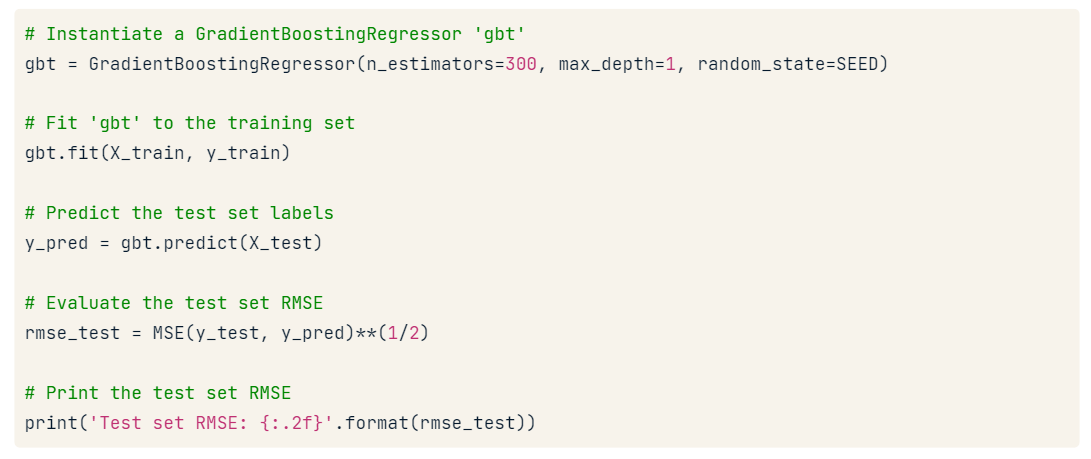

In [566]:
# X = df.iloc[:,0:13].copy()
# y = df.iloc[:,13].copy()

X=train_DT_2.iloc[:,0:342]
y=churn.values.ravel()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.5, stratify = y)
# log_reg=LogisticRegression(C=1000,max_iter=10000)
# log_reg.fit(X_train,y_train)
# y_pred = log_reg.predict(X_test)

In [567]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error as MSE

SEED = 1

gbt = GradientBoostingRegressor(n_estimators = 300, max_depth=1, random_state = SEED)

gbt.fit(X_train, y_train)

y_pred = gbt.predict(X_test)

rmse_test = MSE(y_test, y_pred) ** (1/2)

print ('Test set RMSE: {:.2f}'.format(rmse_test))

Test set RMSE: 0.26


In [568]:
from sklearn.metrics import roc_auc_score
# print (roc_auc_score(y_test, y_pred_prob))
cv_scores2 = cross_val_score (gbt, X, y, cv=5, scoring ='roc_auc')
print (cv_scores2)
print(np.mean(cv_scores2))

[0.72729455 0.67863261 0.67996874 0.73873964 0.73138852]
0.7112048108206077


In [563]:
# from sklearn.metrics import roc_curve
# y_pred_prob = gbt.predict_proba(X_test)[:,1]
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# plt.plot([0,1],[0,1],'k--')
# plt.plot(fpr,tpr,label = 'Logistic Regression')
# plt.xlabel('False positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Logistic Regression ROC Curve')
# plt.show()



ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [557]:
# X = df.iloc[:,0:13].copy()
# y = df.iloc[:,13].copy()

X=train_DT_2.iloc[:,0:342]
y=churn.values.ravel()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.2, stratify = y)
# log_reg=LogisticRegression(C=1000,max_iter=10000)
# log_reg.fit(X_train,y_train)
# y_pred = log_reg.predict(X_test)

In [556]:
len(y)

10000

In [451]:
y

array([0, 0, 1, 0, 0], dtype=int64)

In [464]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn import metrics

rt = DecisionTreeRegressor(criterion = 'gini', max_depth=5)

In [472]:
model_r = rt.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').